In [1]:
%cd /content/drive/MyDrive/Colab \Notebooks
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks
diabetic-retinopathy-detection	ICD-10	Untitled0.ipynb
fashion_yolov4			Lee
Fashion_YOLOv4_pytorch.ipynb	MCUT


In [2]:
import pandas as pd
train_df = pd.read_csv("MCUT/course/House prices/train.csv", encoding="utf-8")
test_df = pd.read_csv("MCUT/course/House prices/test.csv", encoding="utf-8")
test_df

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]

In [14]:
train_df_drop = train_df.drop(["SalePrice"], axis=1) # Remove "SalePrice. 參數 axis = 0 表示要刪除觀測值（row），指定參數 axis = 1 表示要刪除欄位（column）"
datas = pd.concat([train_df_drop, test_df], axis=0) # 合併資料 axis=0 為直向合併 axis=0 為橫向合併
datas = datas.drop(["Id"], axis=1)
datas

MSSubClass MSZoning  LotFrontage  ...  YrSold SaleType SaleCondition
0             60       RL         65.0  ...    2008       WD        Normal
1             20       RL         80.0  ...    2007       WD        Normal
2             60       RL         68.0  ...    2008       WD        Normal
3             70       RL         60.0  ...    2006       WD       Abnorml
4             60       RL         84.0  ...    2008       WD        Normal
...          ...      ...          ...  ...     ...      ...           ...
1454         160       RM         21.0  ...    2006       WD        Normal
1455         160       RM         21.0  ...    2006       WD       Abnorml
1456          20       RL        160.0  ...    2006       WD       Abnorml
1457          85       RL         62.0  ...    2006       WD        Normal
1458          60       RL         74.0  ...    2006       WD        Normal

[2919 rows x 79 columns]

In [13]:
na = datas.isna().sum()
na[na != 0].sort_values(ascending=False) # sort_valu 排序 ascending = False 降冪, True 升冪

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [11]:
datas = datas.drop(na[na > 1000].index, axis=1)
datas

MSSubClass MSZoning  LotFrontage  ...  YrSold SaleType SaleCondition
0             60       RL         65.0  ...    2008       WD        Normal
1             20       RL         80.0  ...    2007       WD        Normal
2             60       RL         68.0  ...    2008       WD        Normal
3             70       RL         60.0  ...    2006       WD       Abnorml
4             60       RL         84.0  ...    2008       WD        Normal
...          ...      ...          ...  ...     ...      ...           ...
1454         160       RM         21.0  ...    2006       WD        Normal
1455         160       RM         21.0  ...    2006       WD       Abnorml
1456          20       RL        160.0  ...    2006       WD       Abnorml
1457          85       RL         62.0  ...    2006       WD        Normal
1458          60       RL         74.0  ...    2006       WD        Normal

[2919 rows x 74 columns]

In [32]:
med = datas.median().drop(["MSSubClass"])
datas = datas.fillna(med) # 填缺失值NA(數字)

In [33]:
datas = pd.get_dummies(datas) # One-Hot Encoding
datas = pd.get_dummies(datas, columns=["MSSubClass"]) # 給columns傳入的必須是列表
datas

LotFrontage  LotArea  ...  MSSubClass_180  MSSubClass_190
0            65.0     8450  ...               0               0
1            80.0     9600  ...               0               0
2            68.0    11250  ...               0               0
3            60.0     9550  ...               0               0
4            84.0    14260  ...               0               0
...           ...      ...  ...             ...             ...
1454         21.0     1936  ...               0               0
1455         21.0     1894  ...               0               0
1456        160.0    20000  ...               0               0
1457         62.0    10441  ...               0               0
1458         74.0     9627  ...               0               0

[2919 rows x 303 columns]

In [42]:
# 取列: .iloc -> [第一筆資料, 第二筆資料...]
x_train = datas.iloc[:train_df.shape[0]]
y_train = train_df["SalePrice"]
x_predict = datas.iloc[train_df.shape[0]:]
predict_id = test_df["Id"]

In [46]:
# TODO: GridSearch自己做
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=75, max_depth=8) # n_estimatiors 決定決策樹的數量, max_depth 深度
reg.fit(x_train, y_train)
pre = reg.predict(x_predict)
result = pd.DataFrame({
    "Id":predict_id,
    "SalePrice":pre
})
# result.to_csv("house_price_rf.csv", encoding="utf-8", index=False)
result

Id      SalePrice
0     1461  128784.833460
1     1462  152399.017526
2     1463  179268.552454
3     1464  181852.766263
4     1465  204931.584433
...    ...            ...
1454  2915   87391.729599
1455  2916   92681.152612
1456  2917  147912.255330
1457  2918  116877.908138
1458  2919  224165.553204

[1459 rows x 2 columns]

In [3]:
datas = pd.concat([train_df, test_df], axis=0)
datas = datas.drop(["SalePrice"], axis=1).reset_index(drop=True)
datas

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0        1          60       RL  ...    2008        WD        Normal
1        2          20       RL  ...    2007        WD        Normal
2        3          60       RL  ...    2008        WD        Normal
3        4          70       RL  ...    2006        WD       Abnorml
4        5          60       RL  ...    2008        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
2914  2915         160       RM  ...    2006        WD        Normal
2915  2916         160       RM  ...    2006        WD       Abnorml
2916  2917          20       RL  ...    2006        WD       Abnorml
2917  2918          85       RL  ...    2006        WD        Normal
2918  2919          60       RL  ...    2006        WD        Normal

[2919 rows x 80 columns]

In [4]:
import numpy as np
from scipy.stats import skew
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

skew: 1.880940746034036
lambda: -0.05453788346513122


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


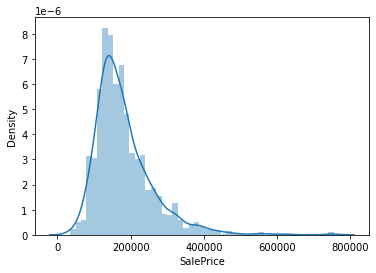

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
y = train_df["SalePrice"]
print("skew:", skew(y)) # 計算偏態
print("lambda:", boxcox_normmax(1 + y)) # 計算將資料從偏態修正回常態分佈最佳參數
sns.distplot(y)

skew: 0.12122191311528363


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


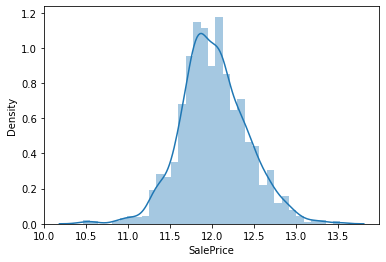

In [6]:
y = train_df["SalePrice"]
y_train_log1p = np.log1p(y) # log 從偏態修正回常態分佈
print("skew:", skew(y_train_log1p))
sns.distplot(y_train_log1p)

In [7]:
s = datas.isna().sum()
s[s > 0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [8]:
datas_drop = datas.drop(["Id", "PoolQC", "MiscFeature", "Alley", "Fence"], axis=1)

In [9]:
idx = datas_drop.dtypes != "object"
number_idx = datas_drop.dtypes[idx].index.drop(["MSSubClass"])
number_idx

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [10]:
import pandas as pd
datas_drop = pd.get_dummies(datas_drop)
datas_drop = pd.get_dummies(datas_drop, columns=["MSSubClass"])
datas_drop

LotFrontage  LotArea  ...  MSSubClass_180  MSSubClass_190
0            65.0     8450  ...               0               0
1            80.0     9600  ...               0               0
2            68.0    11250  ...               0               0
3            60.0     9550  ...               0               0
4            84.0    14260  ...               0               0
...           ...      ...  ...             ...             ...
2914         21.0     1936  ...               0               0
2915         21.0     1894  ...               0               0
2916        160.0    20000  ...               0               0
2917         62.0    10441  ...               0               0
2918         74.0     9627  ...               0               0

[2919 rows x 290 columns]

In [28]:
def getskew(series):
  return skew(series.dropna() + 1)
skewness = (datas_drop[number_idx].apply(getskew)
                  .sort_values(ascending=False))
need_saved = skewness[skewness > 1].index
print(need_saved)
skewness[skewness > 1]

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'LotFrontage', '1stFlrSF', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF'],
      dtype='object')


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.145323
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.929996
MasVnrArea        2.601240
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.502351
1stFlrSF          1.469604
BsmtFinSF1        1.424989
GrLivArea         1.269358
TotalBsmtSF       1.162285
dtype: float64

In [29]:
def save(s):
    lamda = boxcox_normmax(s.dropna() + 1)
    return boxcox1p(s, lamda)
datas_drop[need_saved] = datas_drop[need_saved].apply(save)
skewness = (datas_drop[number_idx].apply(getskew)
                  .sort_values(ascending=False))
skewness

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


PoolArea         14.985994
3SsnPorch         8.865144
LowQualFinSF      8.495602
MiscVal           5.239894
KitchenAbvGr      3.779896
BsmtHalfBath      3.779434
ScreenPorch       3.153911
BsmtFinSF2        2.578898
EnclosedPorch     2.150157
MasVnrArea        0.967387
BsmtUnfSF         0.919351
2ndFlrSF          0.861675
WoodDeckSF        0.784768
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.623741
OpenPorchSF       0.621025
OverallCond       0.570312
BsmtFinSF1        0.374365
TotalBsmtSF       0.369784
BedroomAbvGr      0.326324
GarageArea        0.241176
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
LotFrontage       0.034596
GrLivArea         0.004848
1stFlrSF         -0.011611
LotArea          -0.135401
GarageCars       -0.218260
GarageYrBlt      -0.381942
YearRemodAdd     -0.451020
YearBuilt        -0.599806
dtype: float64

In [30]:
datas_drop = datas_drop.fillna(datas_drop.median())
datas_drop

LotFrontage    LotArea  ...  MSSubClass_180  MSSubClass_190
0       12.913513  13.424520  ...               0               0
1       14.416585  13.694527  ...               0               0
2       13.227729  14.034133  ...               0               0
3       12.372322  13.683421  ...               0               0
4       14.791629  14.550142  ...               0               0
...           ...        ...  ...             ...             ...
2914     6.893132  10.503897  ...               0               0
2915     6.893132  10.463055  ...               0               0
2916    20.642126  15.304040  ...               0               0
2917    12.591549  13.873786  ...               0               0
2918    13.834909  13.700502  ...               0               0

[2919 rows x 290 columns]

In [35]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() # RobustScaler 中位數和四分位數標準化
datas_norm = pd.DataFrame(scaler.fit_transform(datas_drop), # fit_transform() 的作用就是先擬合數據，然後轉化它將其轉化為標準形式
              columns=datas_drop.columns)
x_train = datas_norm.iloc[:len(train_df)]
x_predict = datas_norm.iloc[len(train_df):]
# y_train_log1p
# x_train: 1460 * 300
# x_predict: 1459 * 300
# y_train_log1p: 1460

In [44]:
cv = LassoCV(cv=10)
cv.fit(x_train, y_train_log1p)
cv.predict(x_predict)

array([11.67039678, 11.93796347, 12.10010921, ..., 12.02576363,
       11.67550997, 12.33707818])

# 廣義線性模型

In [36]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
cv = LassoCV(cv=10)
cv.fit(x_train, y_train_log1p)
print(cv.alpha_)
model = Lasso(cv.alpha_) # 預測稀疏係數的線性模型, L1正則化
model.fit(x_train, y_train_log1p)
pre = model.predict(x_predict)
result = pd.DataFrame({
    "Id":test_df["Id"],
    "SalePrice":np.expm1(pre)
})
result.to_csv("lasso.csv", encoding="utf-8", index=False)
result

0.0006911174691246549


Id      SalePrice
0     1461  117053.717740
1     1462  152963.854575
2     1463  179890.507524
3     1464  201177.877049
4     1465  200328.985920
...    ...            ...
1454  2915   90473.576477
1455  2916   84684.266106
1456  2917  167001.428228
1457  2918  117653.773755
1458  2919  227993.818212

[1459 rows x 2 columns]

In [29]:
cv = RidgeCV(cv=10)
cv.fit(x_train, y_train_log1p)
print(cv.alpha_)
model = Ridge(cv.alpha_) # L2正則化 對係數大小進行懲罰
model.fit(x_train, y_train_log1p)
pre = model.predict(x_predict)
result = pd.DataFrame({
    "Id":test_df["Id"],
    "SalePrice":np.expm1(pre)
})
result.to_csv("ridge.csv", encoding="utf-8", index=False)
result

10.0


Id      SalePrice
0     1461  115711.003028
1     1462  153854.892415
2     1463  180078.746993
3     1464  195835.125129
4     1465  201660.895944
...    ...            ...
1454  2915   85850.234914
1455  2916   80152.645495
1456  2917  165233.274507
1457  2918  116924.535221
1458  2919  219994.561065

[1459 rows x 2 columns]

In [30]:
cv = ElasticNetCV(cv=10)
cv.fit(x_train, y_train_log1p)
print(cv.alpha_)
model = ElasticNet(cv.alpha_) # 同時使用L1和L2正則化来訓練線性回歸模型
model.fit(x_train, y_train_log1p)
pre = model.predict(x_predict)
result = pd.DataFrame({
    "Id":test_df["Id"],
    "SalePrice":np.expm1(pre)
})
result.to_csv("elastic.csv", encoding="utf-8", index=False)
result

0.0007376572132301591


Id      SalePrice
0     1461  117369.042285
1     1462  153564.971637
2     1463  180704.325435
3     1464  199710.571205
4     1465  202743.200940
...    ...            ...
1454  2915   88200.975982
1455  2916   82180.695712
1456  2917  166104.442841
1457  2918  116580.955708
1458  2919  223816.292869

[1459 rows x 2 columns]